# Part B

In baseball, a team can provide a departing free agent player with a qualifying offer1: a one-year contract whose monetary value is the average of the 125 highest salaries from the past season. The player is free to reject it and sign with any other team, but his new team will have to forfeit a draft pick.

Use the provided dataset to write a program or application that determines the monetary value of the upcoming qualifying offer and displays the amount along with any other relevant information or visualizations to the user. Note that while the URL and general format of the data will be consistent, the data itself can change slightly with each page load, so make sure your code pulls the data each time it is run and expect the final result to change each time.

You should submit a link or file containing your response to the question, including all source code. The link or file should contain a README that contains clear, step-by-step instructions for how to run or access your response.

Submissions will be graded on accuracy, readability, reproducibility, error handling and presentation of the result to the user. Use of online resources such as Stack Overflow is encouraged, but please cite (by including a comment in your code with a link to the resource) any answers used and provide comments on your particular implementation if appropriate. Use of open-source/third-party libraries is encouraged.

Data: https://questionnaire-148920.appspot.com/swe/data.html

Tip: As is often the case, the data sometimes contains corrupted or malformed values. Do your best to handle these and feel free to ignore missing values, but make sure they don’t interfere with the calculation or presentation of the final result.

Some details of the rules have changed, but we will use the old rules for simplicity



In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [6]:
def extract():
    url = "https://questionnaire-148920.appspot.com/swe/data.html"
    dfs = pd.read_html(url)    
    df = dfs[0]
    return df

In [7]:
def clean(salary_data):
    clean_data = []

    for i in range(len(salary_data)):
        if salary_data[i] == 'no salary data' or pd.isna(salary_data[i]):
            continue
        temp = [x[0] for x in re.findall('(\$[0-9]+(\.[0-9]+)?)', df['Salary'][i].replace(',', ''))]
        if len(temp) == 0:
            temp = [salary_data[i]]
        if temp[0][0] != '$':
            clean_data.append(int(temp[0]))
        else:
            clean_data.append(int(temp[0][1:]))

    clean_data.sort(reverse=True)
    
    return clean_data

In [8]:
def plot_histogram(data):
    plt.hist(data)
    plt.show()

In [9]:
def plot_scatter(data):
    unique = defaultdict(int)

    for salary in data:
        unique[salary] += 1

    plt.scatter(*zip(*unique.items()))
    plt.show()

In [12]:
def compute_average(data):
    return sum(data)/len(data)

In [13]:
def format_average(avg):
    temp = str(avg).split('.')[0][::-1]
    output = []
    for i in range(len(temp)):
        if (i) % 3 == 0 and i != 0:
            output.append(',')
        output.append(temp[i])
    return ''.join(output[::-1])

In [20]:
def summarize(data):
    plot_histogram(data)
    plot_scatter(data)
    avg = compute_average(data)
    formatted_avg = format_average(avg)
    print("The average salary for the given dataset is ${}.".format(formatted_avg))    

## Extract and Clean Salary Data

In [21]:
df = extract()
df

,Player,Salary,Year,Level
0,"Abreu, Jose","$11,666,667",2016,MLB
1,"Acevedo, Andury","$507,500",2016,MLB
2,"Ackley, Dustin","$3,200,000",2016,MLB
3,"Adames, Cristhian","$507,500",2016,MLB
4,"Adams, Austin","$507,500",2016,MLB
...,...,...,...,...
1203,"Zimmerman, Ryan","$14,000,000",2016,MLB
1204,"Zimmermann, Jordan","$18,000,000",2016,MLB
1205,"Zobrist, Ben","$10,500,000",2016,MLB
1206,"Zunino, Mike","$507,500",2016,MLB


In [22]:
salary_data = df['Salary']
clean_data = clean(salary_data)
top_125_salaries = clean_data[:125]

top_125_avg = compute_average(top_125_salaries)
formatted_top_125_avg = format_average(top_125_avg)

## Top 125 Salaries

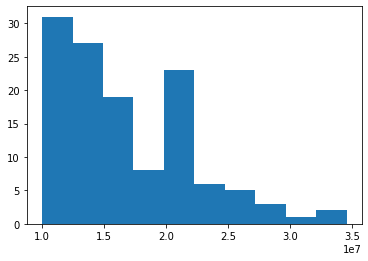

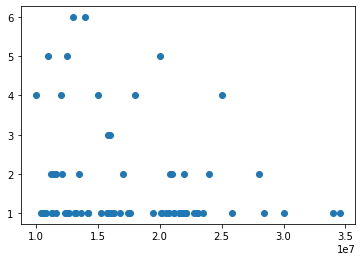

The average salary for the given dataset is $16,655,394.


In [23]:
summarize(top_125_salaries)

In [24]:
print("The monetary value of the upcoming qualifying offer is ${}.".format(formatted_top_125_avg))

The monetary value of the upcoming qualifying offer is $16,655,394.


## Entire Salary Distribution

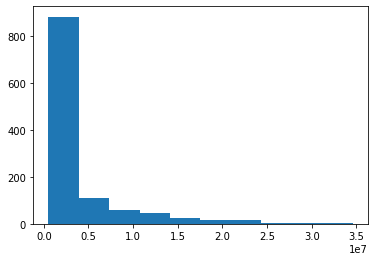

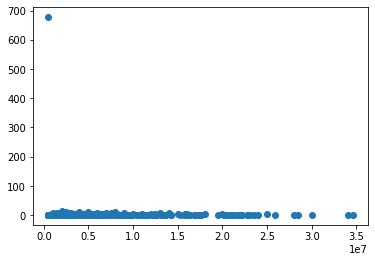

The average salary for the given dataset is $3,320,845.


In [25]:
summarize(clean_data)